# Visualization of Kaggle Kobe Bryant Data
#### Laura Bishop, Kim Wong, Bama Parthasarathy

#### Due 28 Jan 2018
 

## Purpose:
The purpose of the Kobe Bryant Shot Completion data (Kobe or Kobe data) was to determine how accurate Kobe 
Bryant was as a basketball player in making a shot.  This data was chosen for its ability to be 
classified and modeled using statisical analysis techniques in Python. 

## Data:
The Kobe data was a Kaggle competition.  It contained 20 years worth of Kobe Bryant shot data and amounts to 
30,679 rows and 25 variables.  The following table describes the attributes of the data set.

|Attribute Name          | Type of Attribute|                                                                         |
|------------------------|------------------|-------------------------------------------------------------------------|
|Action_Type             |Categorical       |Driving Dunk, Driving Bank, Cutting Layup, Cutting Finger, Dunk, Alley Oop Layup, Alley Oop Dunk, Driving Float Bank Jump, Driving Float, Driving Finger Roll, Driving Finger Roll Layup, Driving Jump, Driving Hook, Driving Layup, Driving Reverse Layup, Driving Slam, Fadeaway Jump, Fadeaway Dunk, Finger Roll Layup, Finger Roll, Floating Jump, Follow Up Dunk, Hook, Hook Bank, Jump Bank, Jump Hook, Jump, Layup, Pullup Bank, Pullup Jump, Putback Dunk, Putback Layup, Putback Slam Dunk, Reverse Slam Dunk, Reverse Layup, Reverse Dunk, Run Layup, Run Dunk, Run Finger Roll, Run Finger Roll Layup, Run Hook, Run Jump, Run Layup, Run Pullup Jump, Run Reverse Layup, Run Slam Dunk, Run Tip, Slam Dunk, Stepback Jump, Tip Layup, Tip, Turnaround Bank, Turnaround Fade Bank Jump, Turnaround Fade, Turnaround Finger, Turnaround Bank, Turnaround Jump|      
|Combined_Shot_Type      |Categorical       |Jump, Layup, Dunk, Bank, Hook, Tip                                       |
|Type                    |Integer - Ordinal |1 to 6 see below                                                         |
|Game_Event_Id           |Integer - Ordinal |2 to 659                                                                 |
|Game_Id                 |Integer - Ordinal |20000012 to 49900088                                                     |              
|Lat                     |Float - Continuous|33.2533 to 34.0883                                                       |            
|Loc_X                   |Float - Continuous|-250 to 248                                                              |
|Loc_Y                   |Float - Continuous|-44 to 791                                                               |
|Lon                     |Float - Continuous|-118.5981 to -118.0218                                                   |                
|Minutes_Remaining       |Integer - Ordinal |0 to 11                                                                  |
|Period                  |Integer - Ordinal |1 to 7 including overtime                                                |
|Playoffs                |Integer - Ordinal |0 or 1                                                                   |
|Season                  |Categorical       |Season years 1996-97 to 2015-16                                          |                         
|Seconds_Remaining       |Integer - Ordinal |0 to 59 seconds                                                          |
|Shot_Distance           |Integer - Ordinal |0 - 79 feet                                                              |
|Shot_Made_Flag          |Integer - Ordinal |0 or 1                                                                   |
|Shot_Type               |Categorical       |2PT Field Goal or 3PT Field Goal                                         |                           
|Shot_Zone_Area          |Categorical       |Back Crt(BC) Center(C) Left(L) Right(R) Left Center(LC) Right Center(RC) |                                                                 |
|Shot_Zone_Basic         |Categorical       |In The Paint, Backcourt, Above the Break 3, Left Corner 3, Right Corner 3, Mid-Range, Restricted Area |                                                                   |
|Shot_Zone_Range         |Categorical       |16-24, 24+, 8-16, Backcourt, Less than 8                                                                  |
|Team_Id                 |Integer - Ordinal |1610612747                                                                  |
|Team_Name               |Categorical       |Los Angeles Lakers                                                                  |
|Game_Date               |Categorical       |1996 - 2006                                                                  | 
|Matchup                 |Categorical       |LAL@ATL, LAL@BKN, LAL@BOS, LAL@CHA, LAL@CHH, LAL@CHI, LAL@CLE, LAL@DAL, LAL@DEN, LAL@DET, LAL@GSW, LAL@HOU, LAL@IND, LAL@LAC, LAL@MEM, LAL@MIA, LAL@MIL, LAL@MIN, LAL@NJH, LAL@NJN, LAL@NOH, LAL@NOK, LAL@NOP, LAL@NYK, LAL@OKC, LAL@ORL, LAL@PHI, LAL@PHO, LAL@PHX, LAL@POR, LAL@SAC, LAL@SAN, LAL@SAS, LAL@SEA, LAL@TOR, LAL@UTA, LAL@VAN, LAL@WAS|                                                                |
|Opponent                |Categorical       |ATL, BKN, BOS, CHA, CHI, CLE, DAL, DEN, DET, GSW, HOU, IND, LAC, MEM, MIA, MIL, NJN, NOA, NOP, NYK, OKC, ORL, PHI, PHX, POR, SAC, SEA, SOR, SAS, TOR, UTA, VAN, WAS                                                                  |
|Shot_Id                 |Integer - Ordinal |1 to 10,000 |                                                                  |


A variable was added to the data set called Type, which enumerates the Combined_Shot_Type categorical 
variable as a numeric:
1.	Jump Shot – 1
2.	Layup – 2
3.	Dunk – 3
4.	Bank Shot – 4
5.	Hook Shot – 5
6.	Tip Shot – 6.

## Data Quality:
This was a relatively clean dataset. Those records that were missing the "Shot_Made_Flag" were moved to a 
test data set for running predictive analysis.  This created a subset of 25,696 to be used for data analysis.

Our analysis will answer three (3) main question areas about Kobe's shot making capabilities.  Those areas are 
as follows:
     1. the period the shot was made (period) (LVB)
     2. the type of shot (action_type, combined_action_type, or type) KW
     3. the distance from the basket - (shot_distance) BP
   
The effectiveness of the dataset will be determined, in the end, by the prediction of Kobe's shot making capabilities. The  
5,000 records that had a missing 'Shot_Made_Flag' value from the original data made up the test data set.
    
    
    

    

## Data Analysis: Period of the Game and Shot Accuracy

In [48]:
#Answer Question 1 - What do we know about Kobe's shot making abilities based on the 'Period' the shot was made?

#Read in data file. Look at head of data set.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/Users/laurabishop/Desktop/7331DMdata/KobeComplete.csv')
                 #names=['action_type', 'combined_shot_type', 'type', 'game_event_id', 'game_id', 'lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs', 'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_id', 'team_name', 'game_date', 'matchup_opponent', 'shot_id'])
print ("Head", df.head())


Head          action_type combined_shot_type  type  game_event_id   game_id  \
0          Jump Shot          Jump Shot     1             12  20000012   
1          Jump Shot          Jump Shot     1             35  20000012   
2          Jump Shot          Jump Shot     1             43  20000012   
3  Driving Dunk Shot               Dunk     3            155  20000012   
4          Jump Shot          Jump Shot     1            244  20000012   

       lat  loc_x  loc_y       lon  minutes_remaining   ...         shot_type  \
0  34.0443   -157      0 -118.4268                 10   ...    2PT Field Goal   
1  33.9093   -101    135 -118.3708                  7   ...    2PT Field Goal   
2  33.8693    138    175 -118.1318                  6   ...    2PT Field Goal   
3  34.0443      0      0 -118.2698                  6   ...    2PT Field Goal   
4  34.0553   -145    -11 -118.4148                  9   ...    2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zone_range     

In [49]:
#Basic info on the attributes of the data set.
print ("Info on dataset", df.info ())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25696 entries, 0 to 25695
Data columns (total 26 columns):
action_type           25696 non-null object
combined_shot_type    25696 non-null object
type                  25696 non-null int64
game_event_id         25696 non-null int64
game_id               25696 non-null int64
lat                   25696 non-null float64
loc_x                 25696 non-null int64
loc_y                 25696 non-null int64
lon                   25696 non-null float64
minutes_remaining     25696 non-null int64
period                25696 non-null int64
playoffs              25696 non-null int64
season                25696 non-null object
seconds_remaining     25696 non-null int64
shot_distance         25696 non-null int64
shot_made_flag        25696 non-null int64
shot_type             25696 non-null object
shot_zone_area        25696 non-null object
shot_zone_basic       25696 non-null object
shot_zone_range       25696 non-null object
team_id             

In [50]:
#Describing each of the 26 attributes.
print ("describe ")
print (df.describe())

describe 
               type  game_event_id       game_id           lat         loc_x  \
count  25696.000000   25696.000000  2.569600e+04  25696.000000  25696.000000   
mean       1.321879     249.357059  2.474128e+07     33.953039      7.148700   
std        0.711421     149.775409  7.738202e+06      0.088152    110.075279   
min        1.000000       2.000000  2.000001e+07     33.253300   -250.000000   
25%        1.000000     111.000000  2.050006e+07     33.884300    -67.250000   
50%        1.000000     253.000000  2.090034e+07     33.970300      0.000000   
75%        1.000000     367.000000  2.960027e+07     34.040300     94.000000   
max        6.000000     653.000000  4.990009e+07     34.088300    248.000000   

              loc_y           lon  minutes_remaining        period  \
count  25696.000000  25696.000000       25696.000000  25696.000000   
mean      91.260897   -118.262651           4.886714      2.520859   
std       88.151983      0.110075           3.452517      1

In [51]:
#Group the attributes by Period (7 periods including overtime) and look at same min, max, mean, quartile and 
#standard deviation.

groupby_period = df.groupby(df['period']).describe()
groupby_period


game_event_id                                                      \
               count        mean        std    min    25%    50%     75%   
period                                                                     
1             6699.0   56.657561  35.306892    2.0   26.0   56.0   85.00   
2             5635.0  191.615439  41.674559   87.0  162.0  195.0  222.00   
3             7002.0  304.971008  43.077275  193.0  272.0  303.0  334.00   
4             6043.0  437.864471  52.232908  293.0  399.0  437.0  473.00   
5              280.0  518.817857  38.120057  434.0  490.0  514.0  546.25   
6               30.0  572.866667  42.080984  515.0  539.0  561.5  603.25   
7                7.0  614.285714  12.711075  598.0  604.5  616.0  622.50   

              game_id               ...        team_id                  type  \
          max   count          mean ...            75%           max   count   
period                              ...                                        
1       458.0  6699.0  2.462974e+07 ...   1.610613e+09  1.610613e+09  6699.0   
2       395.0  5635.0  2.500219e+07 ...   1.610613e+09  1.610613e+09  5635.0   
3       558.0  7002.0  2.443271e+07 ...   1.610613e+09  1.610613e+09  7002.0   
4       634.0  6043.0  2.500700e+07 ...   1.610613e+09  1.610613e+09  6043.0   
5       624.0   280.0  2.455019e+07 ...   1.610613e+09  1.610613e+09   280.0   
6       653.0    30.0  2.181730e+07 ...   1.610613e+09  1.610613e+09    30.0   
7       632.0     7.0  2.088659e+07 ...   1.610613e+09  1.610613e+09     7.0   

                                                     
            mean       std  min  25%  50%  75%  max  
period                                               
1       1.329004  0.719236  1.0  1.0  1.0  1.0  6.0  
2       1.333097  0.711209  1.0  1.0  1.0  1.0  6.0  
3       1.329763  0.720224  1.0  1.0  1.0  1.0  6.0  
4       1.293563  0.686950  1.0  1.0  1.0  1.0  6.0  
5       1.332143  0.776239  1.0  1.0  1.0  1.0  6.0  
6       1.266667  0.583292  1.0  1.0  1.0  1.0  3.0  
7       1.857143  1.864454  1.0  1.0  1.0  1.5  6.0  

[7 rows x 112 columns]

In [52]:
#Organize the data.  Anticipating future need and use.
#categorical variables with no order or number.
cat_features = ['action_type', 'combined_shot_type', 'season', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name', 'game_date', 'matchup', 'opponent']
#ordinal variables
ordinal_features = ['type', 'game_event_id', 'game_id', 'minutes_remaining', 'period', 'playoffs', 'seconds_remaining', 'team_id', 'shot_id', 'shot_made_flag', 'shot_distance', 'shot_id' ]
df[ordinal_features] = df[ordinal_features].astype(np.int32)
#print (df[ordinal_features].describe())  only printing out data based on Period to keep clutter down.

#No Output in Project 1.



In [53]:
#Looking at shot totals.

print ("Total number of shots")
total_shot = len(df)
print (total_shot)
print (" ")

print ("Total number of shots made")
total_made = len(df[df.shot_made_flag==1])
print (total_made)
print (" ")

print ("Percentage of Total Shots Made ")
print (float(len(df[df.shot_made_flag==1]))/len(df)*100.0)
print (" ")



Total number of shots
25696
 
Total number of shots made
11465
 
Percentage of Total Shots Made 
44.6178393524284
 


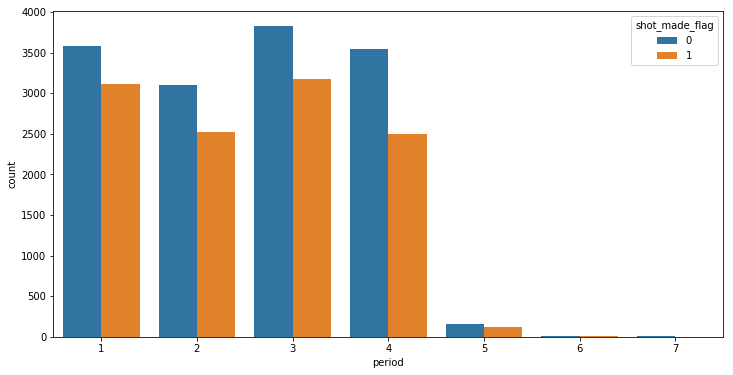

In [7]:
#Plot
plt.figure(figsize=(12,6))
sns.countplot(x="period", hue="shot_made_flag", data=df)
plt.show()

The data showed that Bryant made the shot 44.6% of the time. 

In [54]:
#Correlation between period & shot_made_flag & plots
print (df[['period','shot_made_flag']].corr())



                period  shot_made_flag
period          1.0000         -0.0322
shot_made_flag -0.0322          1.0000


There is a negative correlation of -.03 between Period and Shot_Made_Flag indicating a weak linear relationship between the two attributes.  This is further supported by the pair plots below.

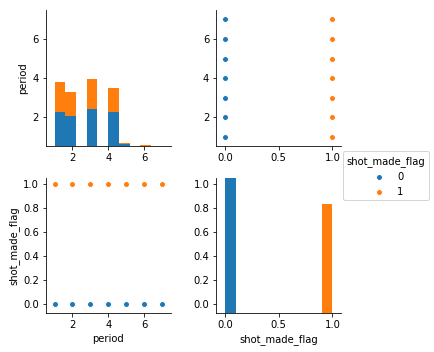

In [55]:
#Pairs Plot
sns.pairplot (df, vars=['period', 'shot_made_flag'], hue='shot_made_flag')
plt.show()


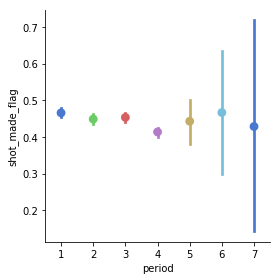

In [56]:
#Factor Plot for period & shot_made_flag
ps = sns.factorplot("period", "shot_made_flag", data=df, kind="point", palette="muted")
plt.show()


The data indicates that Bryant's performance was fairly consistant during regular game play, with a slight decline in overtime periods. Regardless of period, the factor plot supports the weak linear relationship.

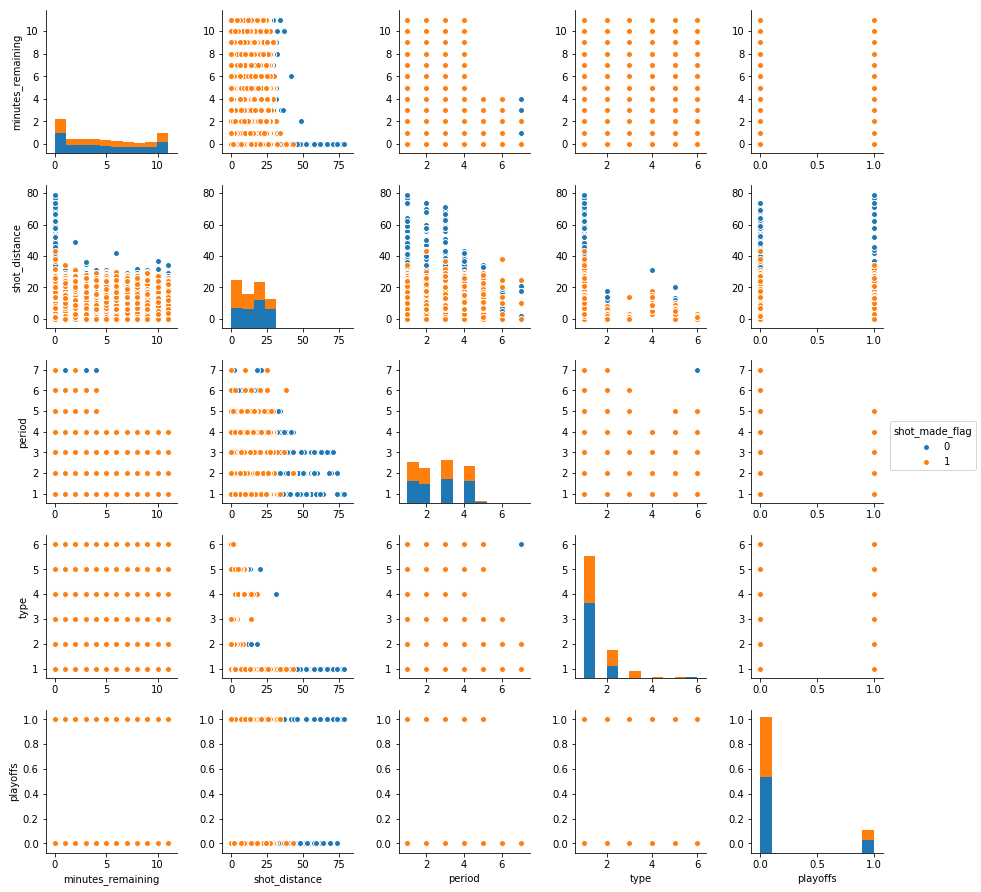

In [7]:
##Data visualization with at least 5 variables - minutes_remaining, shot_distance, period, type, playoffs
sns.pairplot(df, vars=['minutes_remaining', 'shot_distance','period', 'type', 'playoffs'], hue='shot_made_flag')
plt.show()

## Data Analysis: Shot Distance and Shot Accuracy

In [60]:
import os
import csv
import pandas as pd
import numpy as np
from datetime import datetime



The packages here below are needed for visualizations, such as Matplotlib, Seaborn, and Plotly:

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import seaborn as sns
import pylab



In [65]:
df = pd.read_csv('/Users/laurabishop/Desktop/7331DMdata/KobeComplete.csv')  #read from github
df
print (df.head())

         action_type combined_shot_type  type  game_event_id   game_id  \
0          Jump Shot          Jump Shot     1             12  20000012   
1          Jump Shot          Jump Shot     1             35  20000012   
2          Jump Shot          Jump Shot     1             43  20000012   
3  Driving Dunk Shot               Dunk     3            155  20000012   
4          Jump Shot          Jump Shot     1            244  20000012   

       lat  loc_x  loc_y       lon  minutes_remaining   ...         shot_type  \
0  34.0443   -157      0 -118.4268                 10   ...    2PT Field Goal   
1  33.9093   -101    135 -118.3708                  7   ...    2PT Field Goal   
2  33.8693    138    175 -118.1318                  6   ...    2PT Field Goal   
3  34.0443      0      0 -118.2698                  6   ...    2PT Field Goal   
4  34.0553   -145    -11 -118.4148                  9   ...    2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zone_range     team_

In [66]:
os.getcwd()

'/Users/laurabishop/Documents/GitHub/KaggleKobe'

In [67]:
#DATA UNDERSTANDING : 2.Describe the meaning and type of data (scale, values, etc.) for each
#attribute in the data file.
df.columns
df.index
df.values
df.dtypes
df.describe

<bound method NDFrame.describe of               action_type combined_shot_type  type  game_event_id   game_id  \
0               Jump Shot          Jump Shot     1             12  20000012   
1               Jump Shot          Jump Shot     1             35  20000012   
2               Jump Shot          Jump Shot     1             43  20000012   
3       Driving Dunk Shot               Dunk     3            155  20000012   
4               Jump Shot          Jump Shot     1            244  20000012   
5              Layup Shot              Layup     2            251  20000012   
6               Jump Shot          Jump Shot     1            265  20000012   
7       Running Jump Shot          Jump Shot     1            294  20000012   
8               Jump Shot          Jump Shot     1            309  20000012   
9               Jump Shot          Jump Shot     1              4  20000019   
10      Running Jump Shot          Jump Shot     1             27  20000019   
11              Ju

In [68]:
df.count()


action_type           25696
combined_shot_type    25696
type                  25696
game_event_id         25696
game_id               25696
lat                   25696
loc_x                 25696
loc_y                 25696
lon                   25696
minutes_remaining     25696
period                25696
playoffs              25696
season                25696
seconds_remaining     25696
shot_distance         25696
shot_made_flag        25696
shot_type             25696
shot_zone_area        25696
shot_zone_basic       25696
shot_zone_range       25696
team_id               25696
team_name             25696
game_date             25696
matchup               25696
opponent              25696
shot_id               25696
dtype: int64

In [69]:
# DATA UNDERSTANDING: #3. Verify data quality: Explain any missing values, duplicate data, and outliers.
# Are those mistakes? How do you deal with these problems? Be specific.

# The following command will indicate those cells with "True" where there is a missing value
pd.isnull(df).head(3)

# There is a simple way to check the number of missing values per variable, using the function
df.isnull().sum()

# The inverse is also possible, that is counting the number of nonmissing values.
df.count()

# To remove the Ouliers for each of your dataframe column, you could get quantile and then filter
q = df["minutes_remaining"].quantile(0.99)
df[df["minutes_remaining"] < q]

,action_type,combined_shot_type,type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,1,12,20000012,34.0443,-157,0,-118.4268,10,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,2
1,Jump Shot,Jump Shot,1,35,20000012,33.9093,-101,135,-118.3708,7,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,3
2,Jump Shot,Jump Shot,1,43,20000012,33.8693,138,175,-118.1318,6,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,4
3,Driving Dunk Shot,Dunk,3,155,20000012,34.0443,0,0,-118.2698,6,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,5
4,Jump Shot,Jump Shot,1,244,20000012,34.0553,-145,-11,-118.4148,9,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,6
5,Layup Shot,Layup,2,251,20000012,34.0443,0,0,-118.2698,8,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,7
6,Jump Shot,Jump Shot,1,265,20000012,33.9363,-65,108,-118.3348,6,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,9
7,Running Jump Shot,Jump Shot,1,294,20000012,33.9193,-33,125,-118.3028,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,10
8,Jump Shot,Jump Shot,1,309,20000012,33.8063,-94,238,-118.3638,1,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,11
10,Running Jump Shot,Jump Shot,1,27,20000019,33.9343,-67,110,-118.3368,7,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,11/1/00,LAL vs. UTA,UTA,13


In [70]:
# DATA UNDERSTANDING: #4 Give simple, appropriate statistics (range, mode, mean, median, variance,
# counts, etc.) for the most important attributes and describe what they mean or if you
# found something interesting. Note: You can also use data from other sources for
# comparison. Explain the significance of the statistics run and why they are meaningful.

df.describe(include='all')
df.describe(include =['number'])
df.describe(include=['object', 'category'])

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,25696,25696,25696,25696,25696,25696,25696,25696,25696,25696,25696
unique,55,6,20,2,6,7,5,1,1558,74,33
top,Jump Shot,Jump Shot,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,4/13/16,LAL @ SAS,SAS
freq,15836,19710,1924,20284,11288,10532,7856,25696,43,853,1638


In [ ]:
# DATA UNDERSTANDING: #5 Visualize the most important attributes appropriately (at least 5 attributes).
#Important: Provide an interpretation for each chart. Explain for each attribute why the
#chosen visualization is appropriate.

In [71]:
#Shot zone: range,area,basic
print(df['shot_zone_range'].unique())
print(df['shot_zone_area'].unique())
print(df['shot_zone_basic'].unique())

['8-16 ft.' '16-24 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']
['Left Side(L)' 'Left Side Center(LC)' 'Right Side Center(RC)' 'Center(C)'
 'Right Side(R)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']


In [72]:
shot_area = df['shot_made_flag'].groupby(df['shot_zone_area']).mean()
shot_area


shot_zone_area
Back Court(BC)           0.013889
Center(C)                0.525602
Left Side Center(LC)     0.361177
Left Side(L)             0.396871
Right Side Center(RC)    0.382567
Right Side(R)            0.401658
Name: shot_made_flag, dtype: float64

In [73]:
# Total amount of shots tried on each Zone:
shot_area_total= df['shot_made_flag'].groupby(df['shot_zone_area']).count()
shot_area_total

shot_zone_area
Back Court(BC)              72
Center(C)                11288
Left Side Center(LC)      3364
Left Side(L)              3132
Right Side Center(RC)     3981
Right Side(R)             3859
Name: shot_made_flag, dtype: int64

In [ ]:
# Total amount of shots made on each Zone:
shot_made= df['shot_made_flag'].groupby(df['shot_zone_area']).sum()
shot_made

In [74]:
# Total amount of shots missed on each Zone:
shot_area_missed = shot_area_total - shot_made
shot_area_missed

Back Court(BC)          NaN
Center(C)               NaN
Left Side Center(LC)    NaN
Left Side(L)            NaN
Right Side Center(RC)   NaN
Right Side(R)           NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
5                       NaN
6                       NaN
7                       NaN
Name: shot_made_flag, dtype: float64

In [75]:
# 5. Visualize the most interesting attributes (at least 5 attributes, your opinion
#on what is interesting)
#Shot zone area
#Number of shots:
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=df)

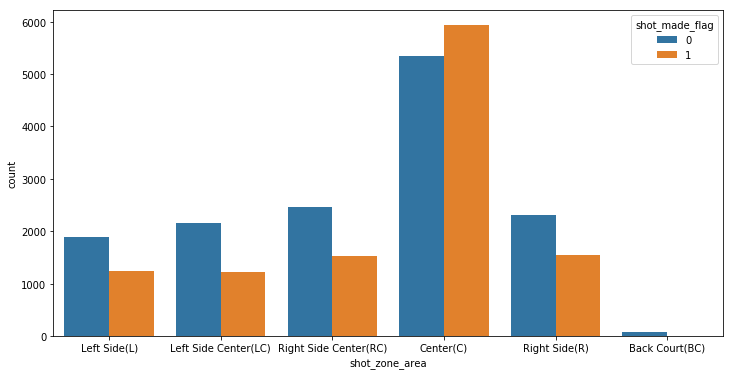

In [76]:
pylab.show()